In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datascience/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


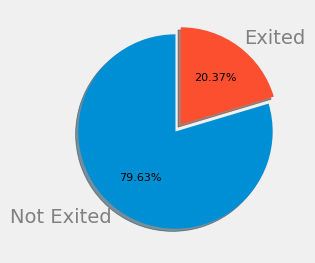

In [6]:
churn_values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']
explode = (0,0.09)

fig, ax = plt.subplots(figsize=(4,3), dpi=100)
wedges, texts, autotexts = ax.pie(
    churn_values, labels=labels, autopct='%1.2f%%',
    shadow = True, startangle =90, explode=explode
)

for text in texts:
  text.set_color('grey')
for autotext in autotexts:
  autotext.set_fontsize(8)
  autotext.set_color('white')
  autotext.set_color('black')

plt.show()

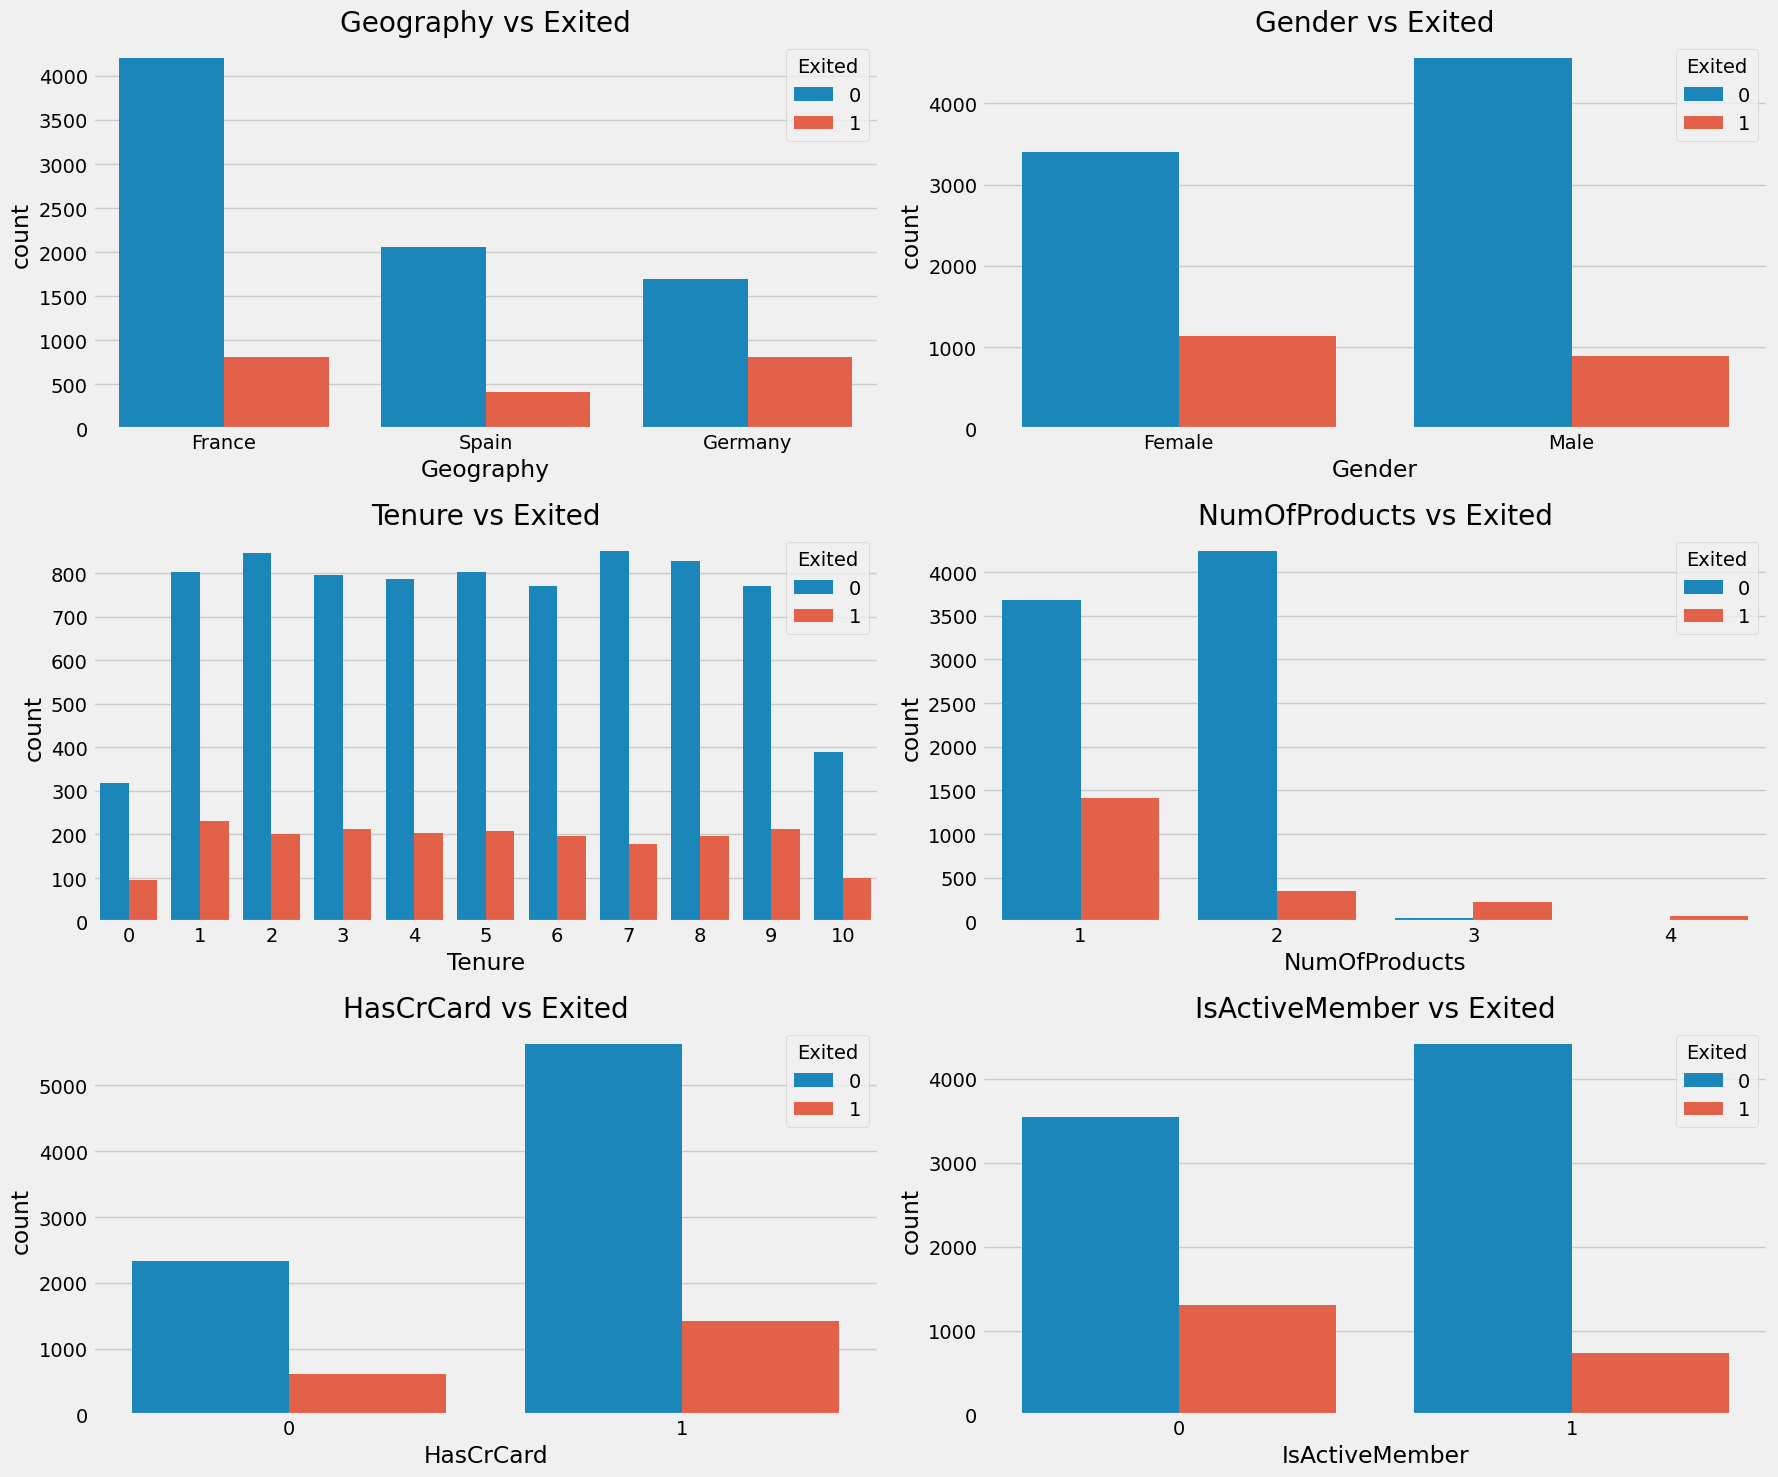

In [7]:
# List of columns to plot
cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Flatten axes for easy looping
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')

plt.tight_layout()
plt.show()

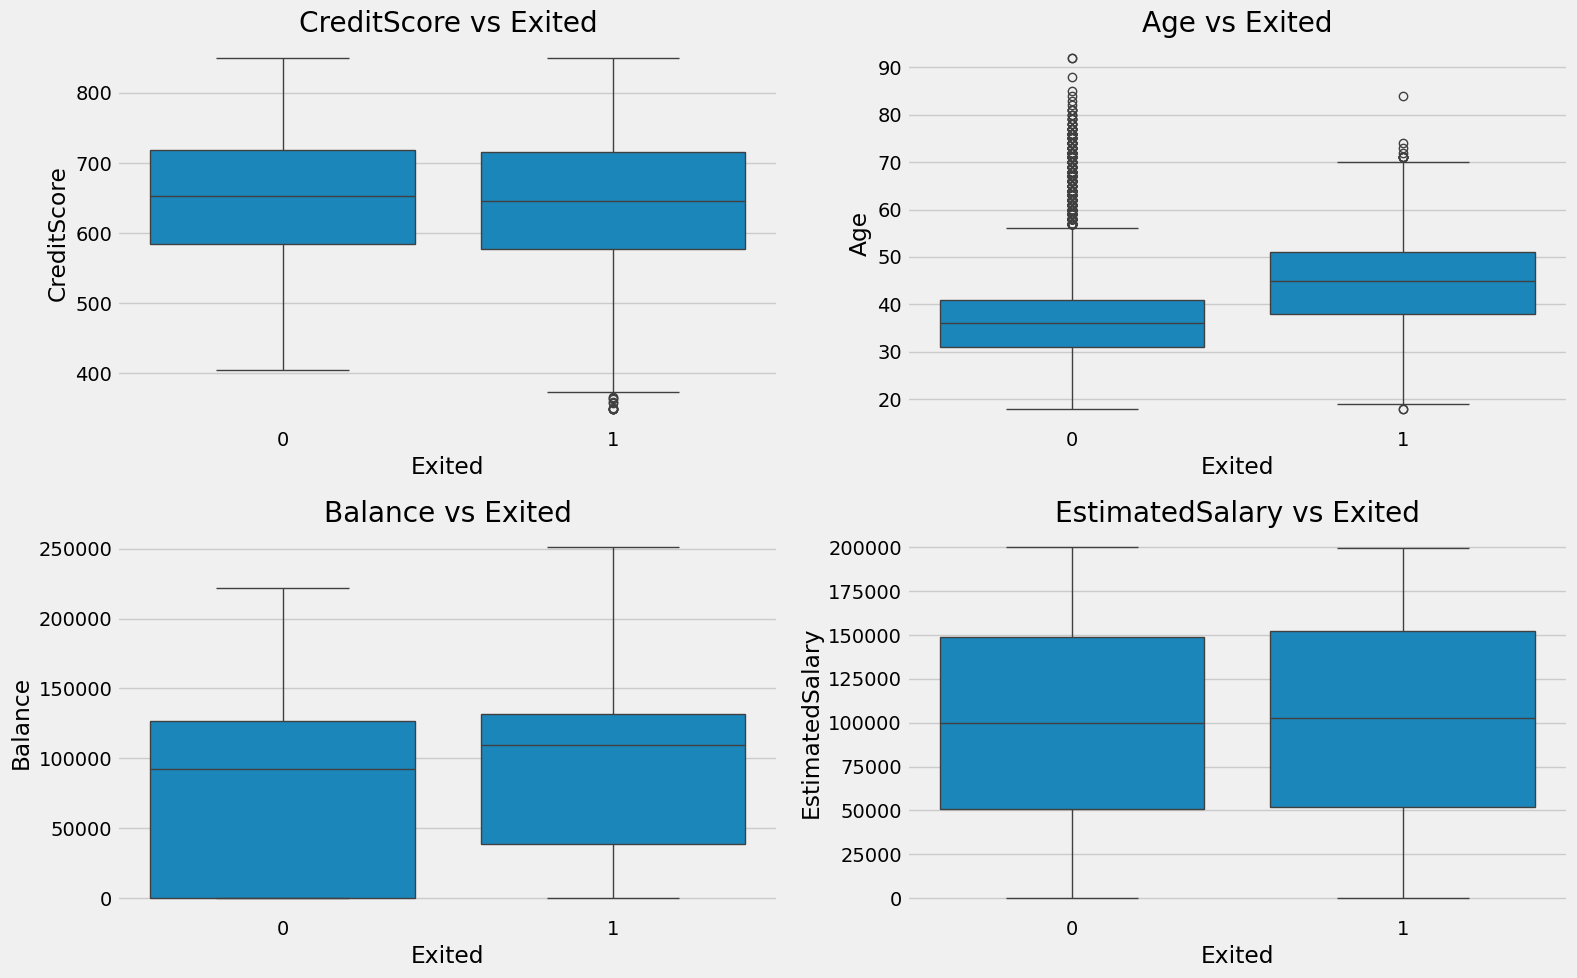

In [8]:
# Columns to plot
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten to 1D for easy looping

# Plot boxplots
for i, col in enumerate(cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')

plt.tight_layout()
plt.show()

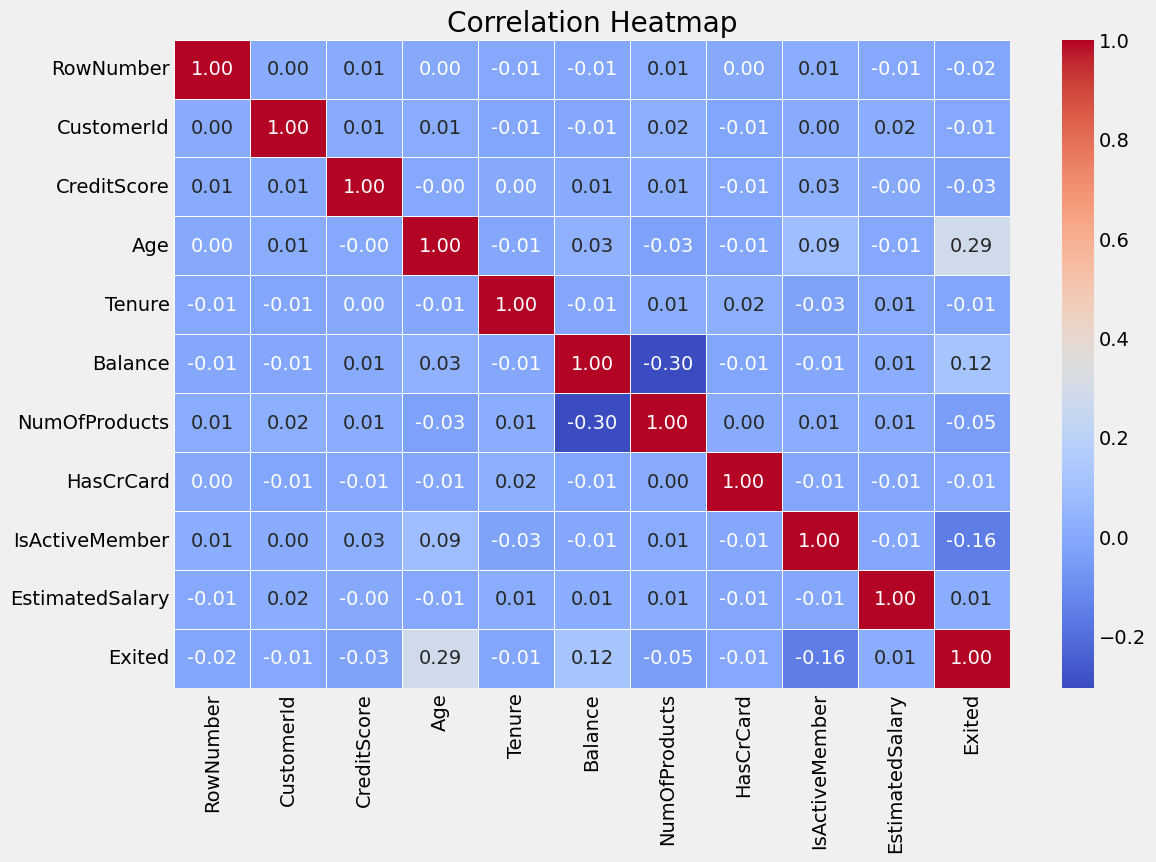

In [9]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Optional: Add title
plt.title('Correlation Heatmap')

plt.show()

In [10]:
# dropping useless columns

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.value_counts("Exited")

,count
Exited,
0,7963
1,2037


In [15]:
X=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy as np

# Step 1: Apply SMOTE (before train-test split)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Skip one-hot encoding (binary classification)

# Step 5: Define the model architecture
input_dim = X_train_scaled.shape[1]
model = Sequential([
    Dense(10, kernel_initializer='normal', activation='relu', input_shape=(input_dim,)),
    Dropout(0.1),
    BatchNormalization(),
    Dense(7, kernel_initializer='normal', activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='sigmoid')  # sigmoid for binary classification
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Compute class weights
class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
))

# Step 8: Train the model
model_history=model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    class_weight=class_weights,
    verbose=1
)

# Step 9: Generate classification report
y_preds = model.predict(X_test_scaled)
y_preds_classes = (y_preds.ravel() > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_preds_classes, target_names=['Class 0', 'Class 1']))


Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7183 - loss: 0.5888 - val_accuracy: 0.7859 - val_loss: 0.5030
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7741 - loss: 0.4776 - val_accuracy: 0.8029 - val_loss: 0.4274
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7794 - loss: 0.4642 - val_accuracy: 0.8019 - val_loss: 0.4229
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7847 - loss: 0.4631 - val_accuracy: 0.8136 - val_loss: 0.4184
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7919 - loss: 0.4526 - val_accuracy: 0.8107 - val_loss: 0.4140
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7818 - loss: 0.4618 - val_accuracy: 0.8104 - val_loss: 0.4143
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7846 - loss: 0.4602 - val_accuracy: 0.8098 - val_loss: 0.4118
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7862 - loss: 0.4550 - val_accu

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8170 - loss: 0.4067
Test Loss: 0.4025
Test Accuracy: 0.8192
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.83      1633
     Class 1       0.83      0.79      0.81      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186


Confusion Matrix:
[[1378  255]
 [ 321 1232]]

ROC-AUC Score: 0.9009
PR-AUC Score: 0.9017


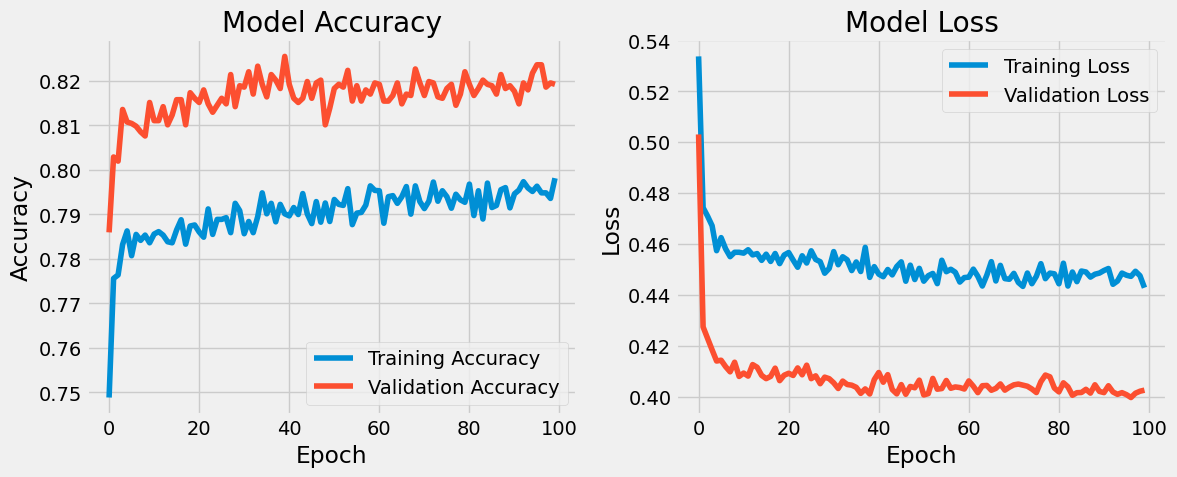

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Step 10: Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 11: Detailed metrics
y_pred_probs = model.predict(X_test_scaled).ravel()             # Sigmoid probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int)               # Threshold at 0.5

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# ROC-AUC and PR-AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)
pr_auc = average_precision_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score: {pr_auc:.4f}")

# Step 12: Visualize training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
